# Bayesian update rule
Situation:
You’re trying to determine how punctual is a politician. From your past experience, you believe that he is usually on time.
Let’s model two possibilities:
	• H1 (Punctual): He is punctual → arrives on time 80% of the time.
	• H2 (Not punctual): He is not punctual → arrives on time 30% of the time.

Initially, based on past experience or some hearsay statement, you believe:
	• P(H1) = 0.7 (He is probably punctual)
	• P(H2) = 0.3


Here's a Python simulation that shows how beliefs about Alex's punctuality update over multiple days based on whether they were late or on time.
**ALSO SEE POWERPOINT**

[0.7, 0.4, 0.16, 0.34, 0.13, 0.04, 0.01, 0.03, 0.08, 0.02]


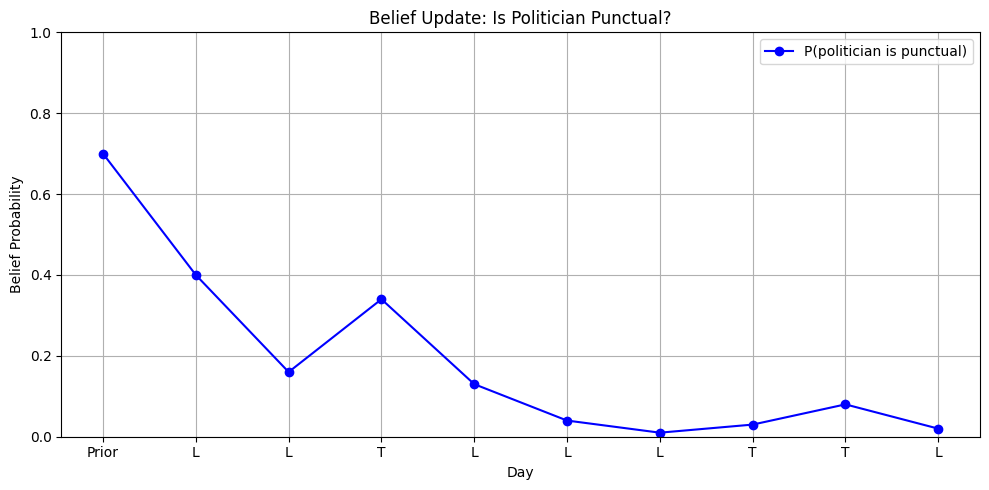

In [6]:
import matplotlib.pyplot as plt

# Initial beliefs (priors)
belief_punctual = 0.7
belief_not_punctual = 0.3

# Likelihoods
P_late_given_punctual     = 0.2 # 1 - 0.8 = 0.2
P_late_given_not_punctual = 0.7 # 1 - 0.3 = 0.7

# Observations: 'L' = late, 'T' = on time
# You can change this sequence to simulate different outcomes
observations = ['L', 'L', 'T', 'L', 'L', 'L', 'T', 'T', 'L']

# Store beliefs over time
beliefs_punctual = [belief_punctual]

for i, obs in enumerate(observations):
    # Total probability of the observation
    if obs == 'L':
        P_obs = (P_late_given_punctual * belief_punctual +
                 P_late_given_not_punctual * belief_not_punctual)
        belief_punctual = (P_late_given_punctual * belief_punctual) / P_obs
    else:  # On time
        P_obs_given_punctual = 1 - P_late_given_punctual
        P_obs_given_not_punctual = 1 - P_late_given_not_punctual
        P_obs = (P_obs_given_punctual * belief_punctual +
                 P_obs_given_not_punctual * belief_not_punctual)
        belief_punctual = (P_obs_given_punctual * belief_punctual) / P_obs

    # Update belief for not punctual
    belief_not_punctual = 1 - belief_punctual

    beliefs_punctual.append(round(belief_punctual,2))

print(beliefs_punctual[:20])
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(beliefs_punctual, marker='o', linestyle='-', color='blue', label="P(politician is punctual)")
plt.title("Belief Update: Is Politician Punctual?")
plt.xlabel("Day")
plt.ylabel("Belief Probability")
plt.xticks(range(len(beliefs_punctual)), labels=['Prior'] + observations)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
